# ANA 522P Data Analysis Project
### Brendan Kade and Elizabeth Robles
### Research question: When hiring influencers for business marketing, what factors (views, subscribers, and income) should we focus on to determine their qualifications, based on successful factors of top global Youtube channels? 

In [589]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [590]:
YoutubeData = pd.read_csv("Global YouTube Statistics.csv", encoding="latin1")
YoutubeData.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [591]:
# Basic dataset information
print("Dataset Info:")
YoutubeData.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                    

## Dataset Size and Scope

There are 995 observations and 28 variables in the entire dataset. We plan to use a subset of this data and include 313 observations and only 7 variables.

## Variable Details

The seven key variables we plan to use are Country, rank, channel_type, uploads, video views, subscribers, highest_yearly_earnings. Note: We will filter the observations to only US-based accounts using the country variable. Then with only US-based accounts, we can removed this variable.

## Data Cleaning

In [594]:
#Subsets the data to the six variables I plan on using
df = YoutubeData[['Country', 'rank', 'channel_type', 'uploads', 'video views', 'subscribers', 'highest_yearly_earnings']]
#Filters to only US accounts
df = df[df['Country'] == 'United States']
#With only US-based accounts, we can remove the Country variable
df = df.drop(columns=['Country'])
#Scale down the subscribers by dividing by 1,000,000 so value are in the millions
df['subscribers']=(df['subscribers']/1000000)
df['video views']=(df['video views']/1000000)
df['highest_yearly_earnings']=(df['highest_yearly_earnings']/1000000)
#View the cleaned dataset
df

rank   channel_type  uploads    video views  subscribers  \
1       2          Games        1       0.000000        170.0   
2       3  Entertainment      741   28368.841870        166.0   
3       4      Education      966  164000.000000        162.0   
6       7  Entertainment     1111   93247.040539        112.0   
9      10  Entertainment      574   77180.169894         98.9   
..    ...            ...      ...            ...          ...   
973   974  Entertainment      690    2394.143260         12.4   
983   984         People        0   16086.808918         12.4   
987   988          Music      205    6202.090191         12.4   
988   989          Games     1340    4779.139505         12.4   
989   990  Entertainment       99    6993.406259         12.4   

     highest_yearly_earnings  
1               5.800000e-07  
2               6.470000e+01  
3               9.480000e+01  
6               3.510000e+01  
9               2.790000e+01  
..                       ...  
973             1.300000e-03  
983             0.000000e+00  
987             2.400000e+00  
988             8.500000e+00  
989             2.400000e+00  

[313 rows x 6 columns]

In [595]:
VDetails = {'Variable Name': ['rank', 'channel_type', 'uploads', 'video views', 'subscribers', 'highest_yearly_earnings'],
        'Description': ['Global Youtube Rank', 'Type of Channel', 'Number of Total Video Uploads', 'Number of Total Video Views', 'Number of Total Subscribers', 'Highest yearly earning'],
        'Type': ['Categorical', 'Categorical', 'Continuous', 'Continuous', 'Continuous', 'Continuous']}
frame = pd.DataFrame(VDetails)
frame

Variable Name                    Description         Type
0                     rank            Global Youtube Rank  Categorical
1             channel_type                Type of Channel  Categorical
2                  uploads  Number of Total Video Uploads   Continuous
3              video views    Number of Total Video Views   Continuous
4              subscribers    Number of Total Subscribers   Continuous
5  highest_yearly_earnings         Highest yearly earning   Continuous

## Outlier Detection and Treatment

In [597]:
# Z-score method for outliers
from scipy import stats
z_scoresU = stats.zscore(df['uploads'])
outliersU = abs(z_scoresU) > 3
print("\nNumber of outliers in uploads:", outliersU.sum())


Number of outliers in uploads: 5


In [598]:
df[outliersU]

rank channel_type  uploads   video views  subscribers  \
11     12       Sports    70127  77428.473662         96.0   
84     85    Nonprofit   200933   7339.333120         38.6   
514   515        Games   156215  16107.116549         17.5   
658   659         News   160405  14198.154095         15.2   
723   724         News    80830  12961.669452         14.7   

     highest_yearly_earnings  
11                      34.3  
84                       2.2  
514                      4.7  
658                      9.0  
723                      8.9

In [599]:
z_scoresVV = stats.zscore(df['video views'])
outliersVV = abs(z_scoresVV) > 3
print("\nNumber of outliers in video views:", outliersVV.sum())


Number of outliers in video views: 6


In [600]:
df[outliersVV]

rank   channel_type  uploads    video views  subscribers  \
3       4      Education      966  164000.000000        162.0   
6       7  Entertainment     1111   93247.040539        112.0   
9      10  Entertainment      574   77180.169894         98.9   
11     12         Sports    70127   77428.473662         96.0   
29     30           Film    39113   59316.472754         59.5   
111   112  Entertainment     2453   55299.840198         35.2   

     highest_yearly_earnings  
3                       94.8  
6                       35.1  
9                       27.9  
11                      34.3  
29                       5.5  
111                     11.5

In [601]:
z_scoresS = stats.zscore(df['subscribers'])
outliersS = abs(z_scoresS) > 3
print("\nNumber of outliers in subscribers:", outliersS.sum())


Number of outliers in subscribers: 6


In [602]:
df[outliersS]

rank   channel_type  uploads    video views  subscribers  \
1      2          Games        1       0.000000        170.0   
2      3  Entertainment      741   28368.841870        166.0   
3      4      Education      966  164000.000000        162.0   
6      7  Entertainment     1111   93247.040539        112.0   
9     10  Entertainment      574   77180.169894         98.9   
11    12         Sports    70127   77428.473662         96.0   

    highest_yearly_earnings  
1              5.800000e-07  
2              6.470000e+01  
3              9.480000e+01  
6              3.510000e+01  
9              2.790000e+01  
11             3.430000e+01

In [603]:
z_scoresHYE = stats.zscore(df['highest_yearly_earnings'])
outliersHYE = abs(z_scoresHYE) > 3
print("\nNumber of outliers in highest_yearly_earnings:", outliersHYE.sum())


Number of outliers in highest_yearly_earnings: 7


In [604]:
df[outliersHYE]

rank   channel_type  uploads    video views  subscribers  \
2       3  Entertainment      741   28368.841870        166.0   
3       4      Education      966  164000.000000        162.0   
211   212         Comedy      865   27006.526665         26.4   
310   311         People     2321   27084.848152         22.6   
417   418  Entertainment      214    7906.181776         19.6   
712   713         People     2222   15788.208522         14.8   
798   799        Animals    41117   18917.687143         14.0   

     highest_yearly_earnings  
2                       64.7  
3                       94.8  
211                     50.2  
310                     56.3  
417                    110.6  
712                     57.8  
798                     65.5

#### We decided to remove the all outliers for the number of uploads, but only the outliers for yearly earnings and video views for accounts not in the top 100 rank because these could signify bot behavior and sponsored accounts.

In [606]:
df = df.drop([11, 84, 514, 658, 723]) #drops Upload outliers
df = df.drop([211, 310, 417, 712, 798]) #drops earning outlier for ranks more than 100
df = df.drop([111]) #drops video view outlier for ranks more than 100
df

rank   channel_type  uploads    video views  subscribers  \
1       2          Games        1       0.000000        170.0   
2       3  Entertainment      741   28368.841870        166.0   
3       4      Education      966  164000.000000        162.0   
6       7  Entertainment     1111   93247.040539        112.0   
9      10  Entertainment      574   77180.169894         98.9   
..    ...            ...      ...            ...          ...   
973   974  Entertainment      690    2394.143260         12.4   
983   984         People        0   16086.808918         12.4   
987   988          Music      205    6202.090191         12.4   
988   989          Games     1340    4779.139505         12.4   
989   990  Entertainment       99    6993.406259         12.4   

     highest_yearly_earnings  
1               5.800000e-07  
2               6.470000e+01  
3               9.480000e+01  
6               3.510000e+01  
9               2.790000e+01  
..                       ...  
973             1.300000e-03  
983             0.000000e+00  
987             2.400000e+00  
988             8.500000e+00  
989             2.400000e+00  

[302 rows x 6 columns]

In [607]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 1 to 989
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     302 non-null    int64  
 1   channel_type             302 non-null    object 
 2   uploads                  302 non-null    int64  
 3   video views              302 non-null    float64
 4   subscribers              302 non-null    float64
 5   highest_yearly_earnings  302 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 16.5+ KB


In [608]:
# Checks for missing each
df.isnull().sum()

rank                       0
channel_type               0
uploads                    0
video views                0
subscribers                0
highest_yearly_earnings    0
dtype: int64

#### There are no missing values.

## Descriptive Statistics

In [611]:
# Display basic summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


rank       uploads    video views  subscribers  \
count  302.000000    302.000000     302.000000   302.000000   
mean   484.917219   1926.844371   11292.231052    23.228146   
std    278.232371   4501.472993   13282.302155    18.649788   
min      2.000000      0.000000       0.000000    12.400000   
25%    261.250000    188.250000    4582.276754    14.700000   
50%    467.500000    553.000000    8438.630344    18.300000   
75%    721.750000   1640.000000   14220.360387    24.100000   
max    990.000000  47926.000000  164000.000000   170.000000   

       highest_yearly_earnings  
count               302.000000  
mean                  5.855618  
std                   9.471587  
min                   0.000000  
25%                   0.811175  
50%                   2.800000  
75%                   6.875000  
max                  94.800000

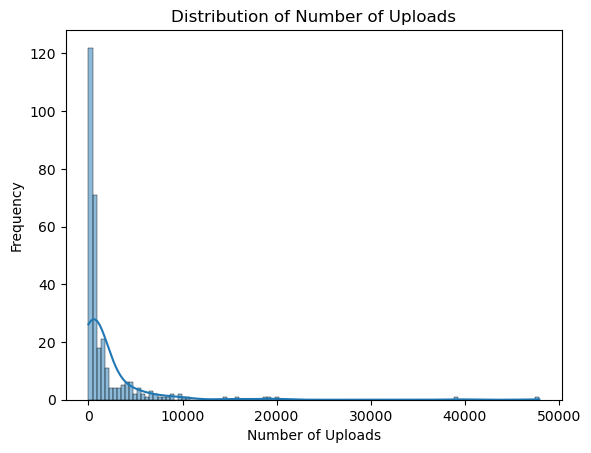

In [675]:
# Histogram
sns.histplot(df['uploads'], kde=True)  # kde=True adds Kernel Density Estimate (KDE) curve
plt.title("Distribution of Number of Uploads")  # Title
plt.xlabel('Number of Uploads')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.show()

In [612]:
# To see frequencies (value counts)
print("\nValue counts in rank:")
df['rank'].value_counts()


Value counts in rank:


rank
2      1
666    1
648    1
645    1
642    1
      ..
319    1
318    1
317    1
314    1
990    1
Name: count, Length: 302, dtype: int64

In [613]:
# To see frequencies (value counts)
print("\nValue counts in channel_type:")
df['channel_type'].value_counts()


Value counts in channel_type:


channel_type
Entertainment    106
Music             81
Games             25
People            22
Education         18
Comedy            15
Howto             12
Film              11
Sports             5
Tech               4
Animals            2
News               1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Channel Types')

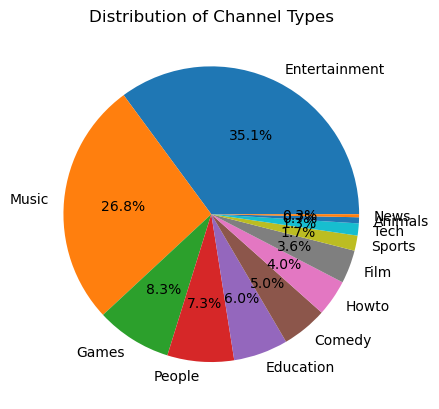

In [614]:
# Pie Chart
counts = df['channel_type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Types')

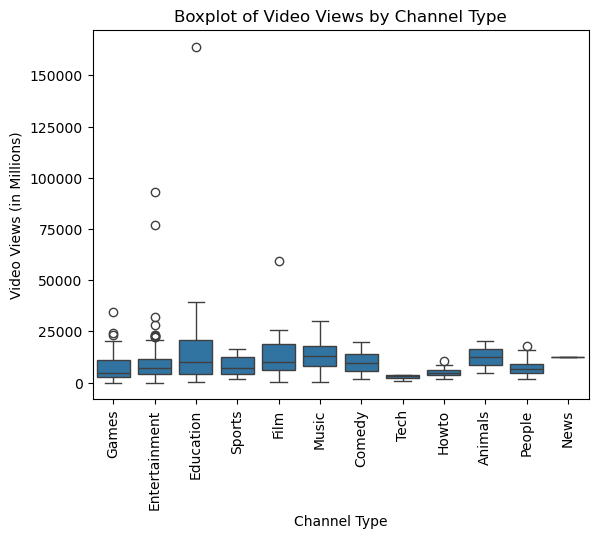

In [615]:
# Boxplot
sns.boxplot(x='channel_type', y='video views', data=df)  # Compare the distribution across groups
plt.title("Boxplot of Video Views by Channel Type")  # Title
plt.xlabel('Channel Type')  # x-axis label
plt.ylabel('Video Views (in Millions)')  # y-axis label
plt.xticks(rotation=90)
plt.show()

## Variable Correlation Analysis

In [617]:
# Calculate correlation matrix for only numerical variables
correlation = df.drop(columns=['channel_type']).corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                             rank   uploads  video views  subscribers  \
rank                     1.000000 -0.068746    -0.432728    -0.603115   
uploads                 -0.068746  1.000000     0.133235     0.019217   
video views             -0.432728  0.133235     1.000000     0.645519   
subscribers             -0.603115  0.019217     0.645519     1.000000   
highest_yearly_earnings -0.297114  0.002035     0.684708     0.557944   

                         highest_yearly_earnings  
rank                                   -0.297114  
uploads                                 0.002035  
video views                             0.684708  
subscribers                             0.557944  
highest_yearly_earnings                 1.000000  


In [618]:
# Find highly correlated pairs
threshold = 0.9
high_correlation = correlation > threshold
print("\nHighly correlated variables (>0.9):")
print(high_correlation)


Highly correlated variables (>0.9):
                          rank  uploads  video views  subscribers  \
rank                      True    False        False        False   
uploads                  False     True        False        False   
video views              False    False         True        False   
subscribers              False    False        False         True   
highest_yearly_earnings  False    False        False        False   

                         highest_yearly_earnings  
rank                                       False  
uploads                                    False  
video views                                False  
subscribers                                False  
highest_yearly_earnings                     True  


#### There are no highly correlated values.

## Inferential Statistics

#### ANOVA tests compare uploads, video views, subscribers, highest yearly earning across channel types

In [622]:
# ANOVA: Compare uploads across channel types
from scipy import stats
uploadsByChannelT = [df[df['channel_type'] == city]['uploads'] for city in df['channel_type']]
uploads_anova = stats.f_oneway(*uploadsByChannelT)
uploads_anova

F_onewayResult(statistic=4.481946657672052, pvalue=1.926208933600353e-126)

In [623]:
# ANOVA: Compare video views across channel types
from scipy import stats
viewsByChannelT = [df[df['channel_type'] == city]['video views'] for city in df['channel_type']]
views_anova = stats.f_oneway(*viewsByChannelT)
views_anova

F_onewayResult(statistic=2.498538774915088, pvalue=2.250839110729613e-39)

In [624]:
# ANOVA: Compare subscribers across channel types
from scipy import stats
subscribersByChannelT = [df[df['channel_type'] == city]['subscribers'] for city in df['channel_type']]
subscribers_anova = stats.f_oneway(*subscribersByChannelT)
subscribers_anova

F_onewayResult(statistic=0.7073934512167027, pvalue=0.9999630399269385)

In [625]:
# ANOVA: Compare highest yearly earning across channel types
from scipy import stats
earningsByChannelT = [df[df['channel_type'] == city]['highest_yearly_earnings'] for city in df['channel_type']]
earnings_anova = stats.f_oneway(*earningsByChannelT)
earnings_anova

F_onewayResult(statistic=0.8532771423177326, pvalue=0.9683020120138539)

#### The results of the ANOVA test show that no p-value had less than 0.05 for four variables, indicating that we do not have enough statitscal evidence to reject the null that there is no difference between the channel types and uploads, video views,  subscribers, highest yearly earnings.

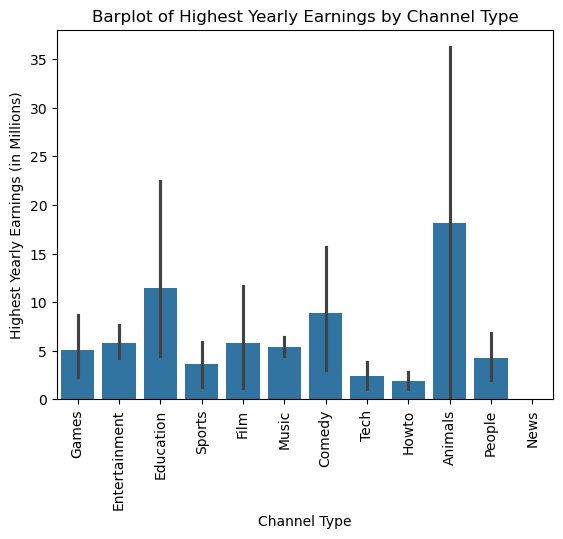

In [627]:
# Bar Plot
sns.barplot(data=df, x='channel_type', y='highest_yearly_earnings')
plt.title("Barplot of Highest Yearly Earnings by Channel Type")  # Title
plt.xlabel('Channel Type')  # x-axis label
plt.ylabel('Highest Yearly Earnings (in Millions)')  # y-axis label
plt.xticks(rotation=90)
plt.show()

In [628]:
# Example 2: Multiple Linear Regression
# Study how multiple features affect house price
# Prepare multiple independent variables
import statsmodels.api as sm
X_multi = df[['uploads', 'video views', 'subscribers', 'highest_yearly_earnings']]
y_multi = df['rank']
X_multi = sm.add_constant(X_multi)

# Fit multiple regression model
multi_model = sm.OLS(y_multi, X_multi).fit()

print("\nMultiple Linear Regression Results:")
print(multi_model.summary())


Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     44.83
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.95e-29
Time:                        13:06:01   Log-Likelihood:                -2056.5
No. Observations:                 302   AIC:                             4123.
Df Residuals:                     297   BIC:                             4142.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

(0.0, 1000.0)

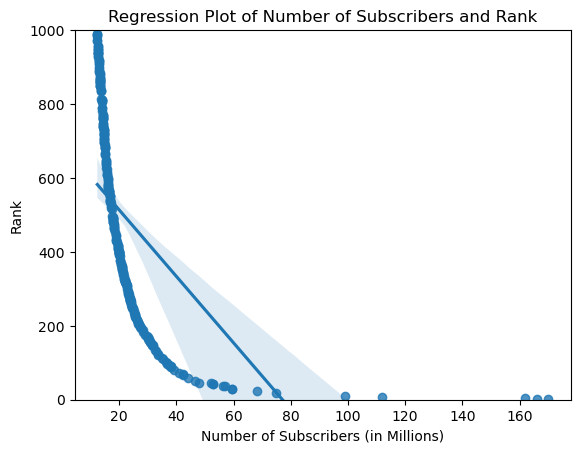

In [685]:
# Regression Plot
sns.regplot(data=df, x='subscribers', y='rank')
plt.title("Regression Plot of Number of Subscribers and Rank")  # Title
plt.xlabel('Number of Subscribers (in Millions)')
plt.ylabel('Rank')
plt.ylim(0, 1000)

#### The results from the multiple linear regression shows a relatively weak relationship, as the adjusted R-squared is 0.368, meaning 36.8% of the variation in the dependent variable (rank) is explained by the independent variables (uploads, video views, subscribers, highest yearly earnings) in the model. However, we also see that subscribers is statistically significant since the p-value is lower than 0.05, meaning as subscribers decrease, rank decreases. Note that the lower the rank is, the most successful the account it. No other varaible is statistically significant.